In [1]:
import pandas as pd
import numpy as np

# 한글폰트 설정, 그래프 마이너스 표시 설정
import matplotlib
from matplotlib import font_manager,rc
from matplotlib import pyplot as plt
import platform
import seaborn as sns

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

## 0. 데이터 불러오기

In [58]:
grand = pd.read_csv('../data/서울대공원/서울대공원 월별입장객.csv', encoding='cp949')
child = pd.read_csv('../data/어린이대공원/어린이대공원 월별입장객.csv', encoding='cp949')
ever = pd.read_csv('../data/에버랜드/에버랜드 월별입장객.csv', encoding='cp949')
lotte = pd.read_csv('../data/롯데월드/롯데월드입장객.csv', encoding='cp949')

In [59]:
grand.rename(columns={'합계':'서울대공원', '월':'monthly'}, inplace=True)
child.rename(columns={'합계':'어린이대공원'}, inplace=True)
ever.rename(columns={'합계':'에버랜드'}, inplace=True)
lotte.rename(columns={'합계':'롯데월드'}, inplace=True)

In [60]:
total = pd.concat([grand, child, ever, lotte], axis=1)
total = total.drop(['월'], axis=1)
total

,monthly,서울대공원,어린이대공원,에버랜드,롯데월드
0,Jan-18,36591,240882,201160,508452
1,Feb-18,42817,259959,240383,536389
2,Mar-18,153987,498248,413211,365255
3,Apr-18,289384,741565,680453,417187
4,May-18,464443,866740,812780,479165
5,Jun-18,293909,588794,579424,342222
6,Jul-18,76303,370150,438252,427204
7,Aug-18,65551,359156,505828,510487
8,Sep-18,290647,644338,669878,429717
9,Oct-18,305936,676471,838744,615488


In [44]:
# total.index=total.index+1
# total

,monthly,서울대공원,어린이대공원,에버랜드,롯데월드,서울대공원증감율
1,Jan-18,36591,240882,201160,508452,17.015113
2,Feb-18,42817,259959,240383,536389,17.015113
3,Mar-18,153987,498248,413211,365255,259.639863
4,Apr-18,289384,741565,680453,417187,87.927552
5,May-18,464443,866740,812780,479165,60.493669
6,Jun-18,293909,588794,579424,342222,-36.717961
7,Jul-18,76303,370150,438252,427204,-74.038563
8,Aug-18,65551,359156,505828,510487,-14.091189
9,Sep-18,290647,644338,669878,429717,343.390642
10,Oct-18,305936,676471,838744,615488,5.260333


In [55]:
# total.reset_index()

,index,monthly,서울대공원,어린이대공원,에버랜드,롯데월드,서울대공원증감율
0,1,Jan-18,36591,240882,201160,508452,17.015113
1,2,Feb-18,42817,259959,240383,536389,17.015113
2,3,Mar-18,153987,498248,413211,365255,259.639863
3,4,Apr-18,289384,741565,680453,417187,87.927552
4,5,May-18,464443,866740,812780,479165,60.493669
5,6,Jun-18,293909,588794,579424,342222,-36.717961
6,7,Jul-18,76303,370150,438252,427204,-74.038563
7,8,Aug-18,65551,359156,505828,510487,-14.091189
8,9,Sep-18,290647,644338,669878,429717,343.390642
9,10,Oct-18,305936,676471,838744,615488,5.260333


## 1. 월별 패턴 시각화

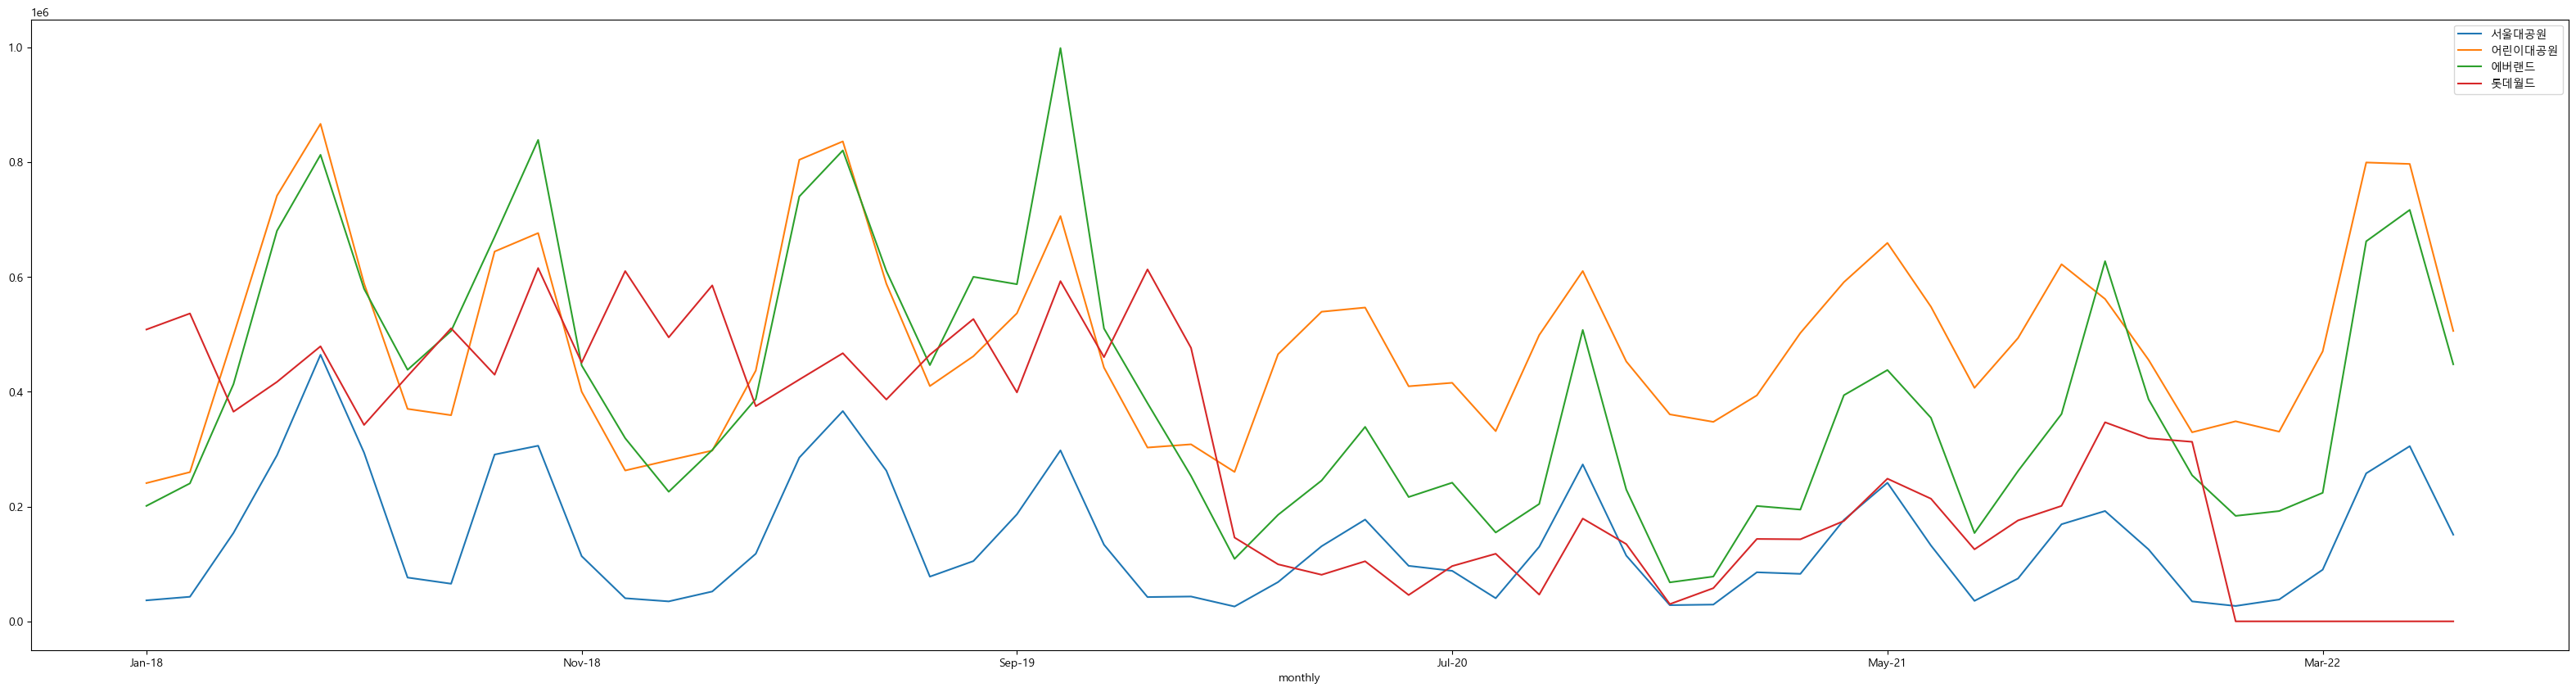

In [32]:
total.plot(x = 'monthly', y = ['서울대공원','어린이대공원','에버랜드','롯데월드'], figsize = (40, 10))
plt.show()

- 신천지 시설, 용인 기흥에 몰려있어서 2020년 초반 방문객이 적었음, 2020년 3월 확진자 다수 발생
- 롯데월드는 실내시설이라 계절 영향을 덜 받고 혼자 다른 그래프 모양을 보임
- 봄/가을의 방문객 수는 많고, 여름/겨울은 적은 패턴을 보임

## 2. 월별 증감율을 알아보자

In [63]:
total['서울대공원증감율'] = (total['서울대공원'][1] - total['서울대공원'][0])/total['서울대공원'][1]*100

In [64]:
for i in range(len(total)):
    total['서울대공원증감율'][i+1] = (total['서울대공원'][i+1] - total['서울대공원'][i])/total['서울대공원'][i]*100

C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\593859601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['서울대공원증감율'][i+1] = (total['서울대공원'][i+1] - total['서울대공원'][i])/total['서울대공원'][i]*100


KeyError: 54

In [65]:
total

,monthly,서울대공원,어린이대공원,에버랜드,롯데월드,서울대공원증감율
0,Jan-18,36591,240882,201160,508452,14.540953
1,Feb-18,42817,259959,240383,536389,17.015113
2,Mar-18,153987,498248,413211,365255,259.639863
3,Apr-18,289384,741565,680453,417187,87.927552
4,May-18,464443,866740,812780,479165,60.493669
5,Jun-18,293909,588794,579424,342222,-36.717961
6,Jul-18,76303,370150,438252,427204,-74.038563
7,Aug-18,65551,359156,505828,510487,-14.091189
8,Sep-18,290647,644338,669878,429717,343.390642
9,Oct-18,305936,676471,838744,615488,5.260333


In [66]:
total['어린이대공원증감율'] = (total['어린이대공원'][1] - total['어린이대공원'][0])/total['어린이대공원'][1]*100
total['에버랜드증감율'] = (total['에버랜드'][1] - total['에버랜드'][0])/total['에버랜드'][1]*100
total['롯데월드증감율'] = (total['롯데월드'][1] - total['롯데월드'][0])/total['롯데월드'][1]*100

In [71]:
for i in range(len(total)):
    total['어린이대공원증감율'][i+1] = (total['어린이대공원'][i+1] - total['어린이대공원'][i])/total['어린이대공원'][i]*100

C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\3518559356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['어린이대공원증감율'][i+1] = (total['어린이대공원'][i+1] - total['어린이대공원'][i])/total['어린이대공원'][i]*100


KeyError: 54

In [72]:
for i in range(len(total)):
    total['에버랜드증감율'][i+1] = (total['에버랜드'][i+1] - total['에버랜드'][i])/total['에버랜드'][i]*100

C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\3019792967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['에버랜드증감율'][i+1] = (total['에버랜드'][i+1] - total['에버랜드'][i])/total['에버랜드'][i]*100


KeyError: 54

In [73]:
for i in range(len(total)):
    total['롯데월드증감율'][i+1] = (total['롯데월드'][i+1] - total['롯데월드'][i])/total['롯데월드'][i]*100

C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\1935568887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['롯데월드증감율'][i+1] = (total['롯데월드'][i+1] - total['롯데월드'][i])/total['롯데월드'][i]*100
C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\1935568887.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  total['롯데월드증감율'][i+1] = (total['롯데월드'][i+1] - total['롯데월드'][i])/total['롯데월드'][i]*100


KeyError: 54

In [75]:
total['서울대공원증감율'][0] = 0
total['어린이대공원증감율'][0]=0
total['에버랜드증감율'][0]=0
total['롯데월드증감율'][0]=0

C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\3581800301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['서울대공원증감율'][0] = 0
C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\3581800301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['어린이대공원증감율'][0]=0
C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\3581800301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['에버랜드증감율'][0]=0
C:\Users\pbpmi\AppData\Local\

In [76]:
total

,monthly,서울대공원,어린이대공원,에버랜드,롯데월드,서울대공원증감율,어린이대공원증감율,에버랜드증감율,롯데월드증감율
0,Jan-18,36591,240882,201160,508452,0.000000,0.000000,0.000000,0.000000
1,Feb-18,42817,259959,240383,536389,17.015113,7.919645,19.498409,5.494521
2,Mar-18,153987,498248,413211,365255,259.639863,91.664070,71.896931,-31.904830
3,Apr-18,289384,741565,680453,417187,87.927552,48.834516,64.674464,14.218012
4,May-18,464443,866740,812780,479165,60.493669,16.879842,19.446898,14.856168
5,Jun-18,293909,588794,579424,342222,-36.717961,-32.067979,-28.710844,-28.579508
6,Jul-18,76303,370150,438252,427204,-74.038563,-37.134210,-24.364196,24.832419
7,Aug-18,65551,359156,505828,510487,-14.091189,-2.970147,15.419439,19.494902
8,Sep-18,290647,644338,669878,429717,343.390642,79.403379,32.431973,-15.822146
9,Oct-18,305936,676471,838744,615488,5.260333,4.986979,25.208471,43.231010


In [84]:
total['실외평균'] = (total['서울대공원증감율']+total['어린이대공원증감율']+total['에버랜드증감율']).mean()

In [87]:
for i in range(len(total)):
    total['실외평균'][i] = (total['서울대공원증감율'][i]+total['어린이대공원증감율'][i]+total['에버랜드증감율'][i])/3

C:\Users\pbpmi\AppData\Local\Temp\ipykernel_19568\266462612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['실외평균'][i] = (total['서울대공원증감율'][i]+total['어린이대공원증감율'][i]+total['에버랜드증감율'][i])/3


In [88]:
total

,monthly,서울대공원,어린이대공원,에버랜드,롯데월드,서울대공원증감율,어린이대공원증감율,에버랜드증감율,롯데월드증감율,증감율평균,실외평균
0,Jan-18,36591,240882,201160,508452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Feb-18,42817,259959,240383,536389,17.015113,7.919645,19.498409,5.494521,12.481922,14.811056
2,Mar-18,153987,498248,413211,365255,259.639863,91.664070,71.896931,-31.904830,97.824008,141.066955
3,Apr-18,289384,741565,680453,417187,87.927552,48.834516,64.674464,14.218012,53.913636,67.145511
4,May-18,464443,866740,812780,479165,60.493669,16.879842,19.446898,14.856168,27.919144,32.273470
5,Jun-18,293909,588794,579424,342222,-36.717961,-32.067979,-28.710844,-28.579508,-31.519073,-32.498928
6,Jul-18,76303,370150,438252,427204,-74.038563,-37.134210,-24.364196,24.832419,-27.676138,-45.178990
7,Aug-18,65551,359156,505828,510487,-14.091189,-2.970147,15.419439,19.494902,4.463251,-0.547299
8,Sep-18,290647,644338,669878,429717,343.390642,79.403379,32.431973,-15.822146,109.850962,151.741998
9,Oct-18,305936,676471,838744,615488,5.260333,4.986979,25.208471,43.231010,19.671698,11.818594


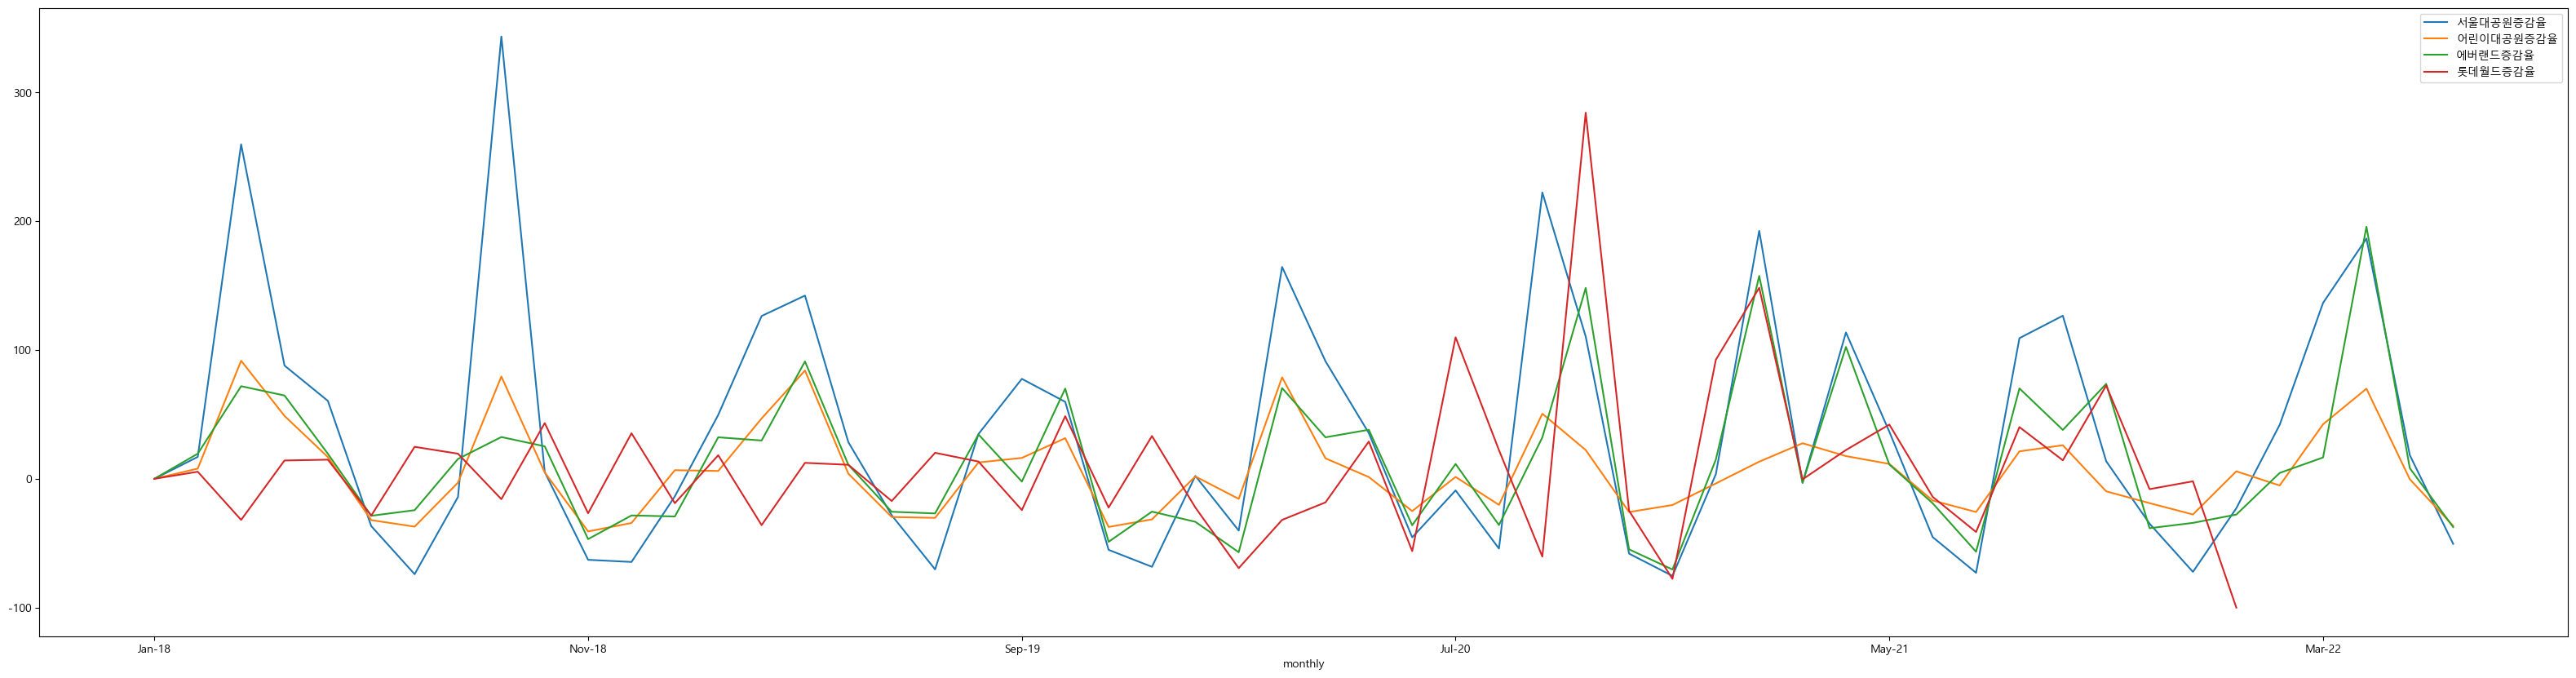

In [77]:
total.plot(x = 'monthly', y = ['서울대공원증감율','어린이대공원증감율','에버랜드증감율','롯데월드증감율'], figsize = (40, 10))
plt.show()

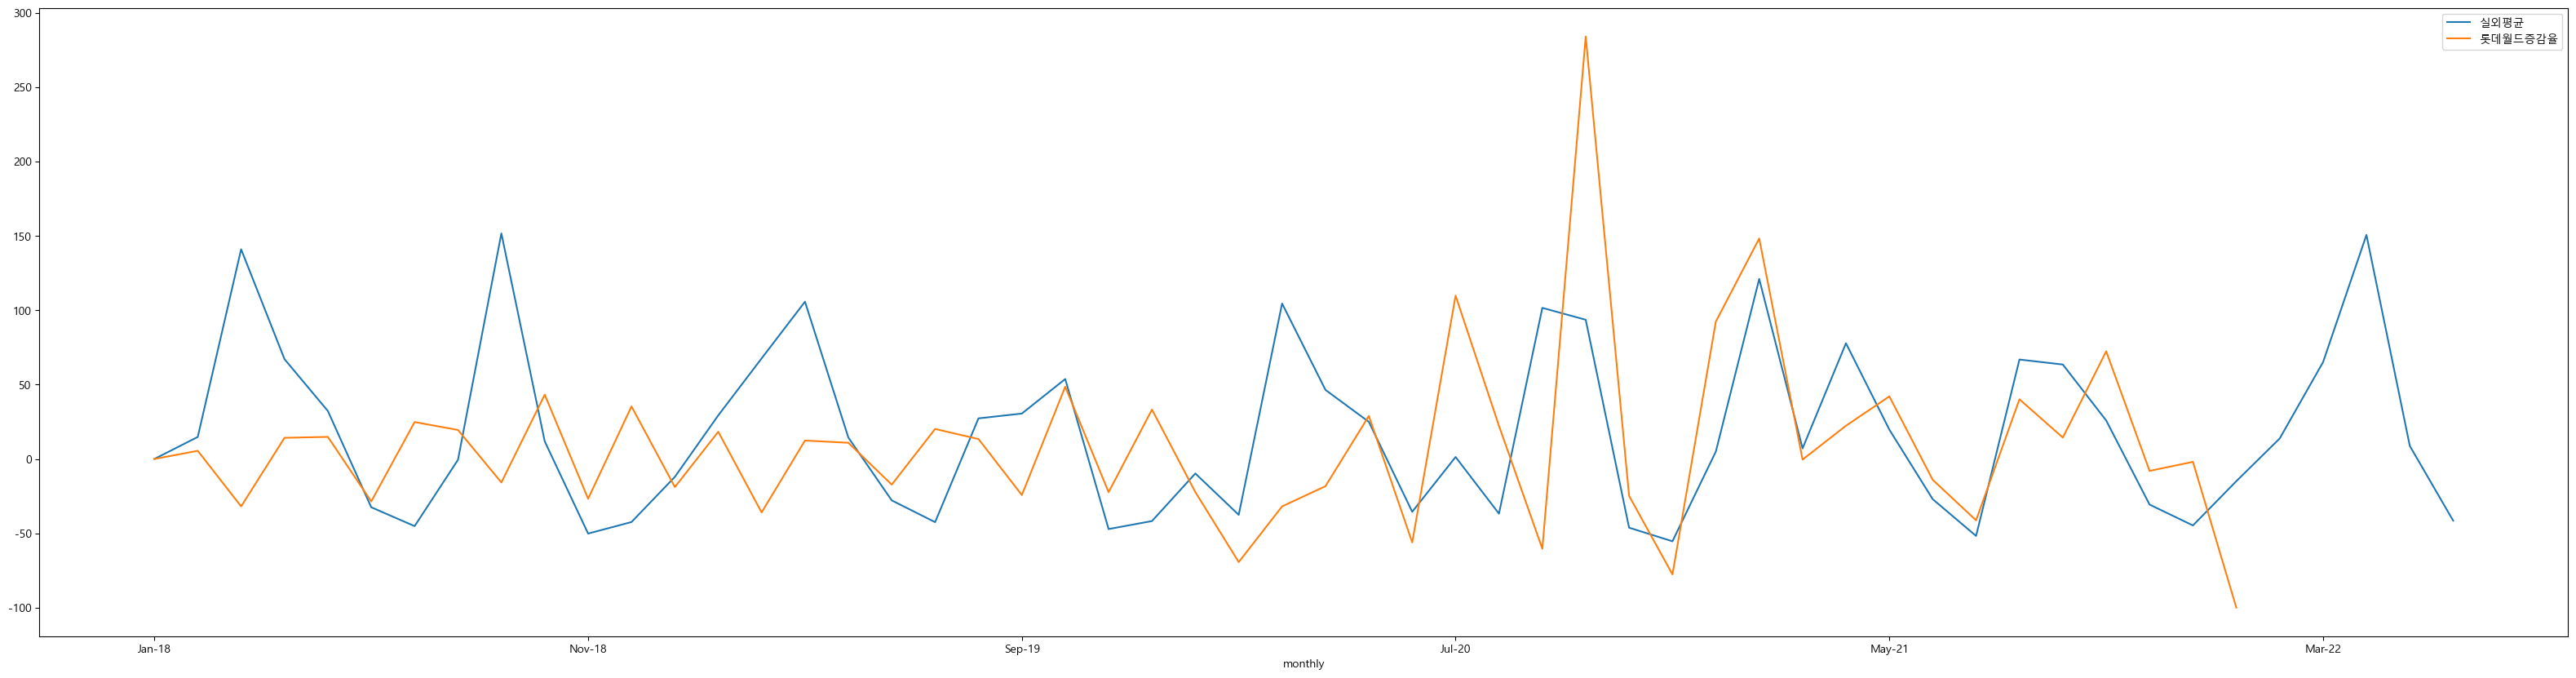

In [89]:
total.plot(x = 'monthly', y = ['실외평균','롯데월드증감율'], figsize = (40, 10))
plt.show()
# 롯데월드 2020년 6월 8,9일 ,6월 16일, 8월 16일 오후부터 17일 14시까지 폐장

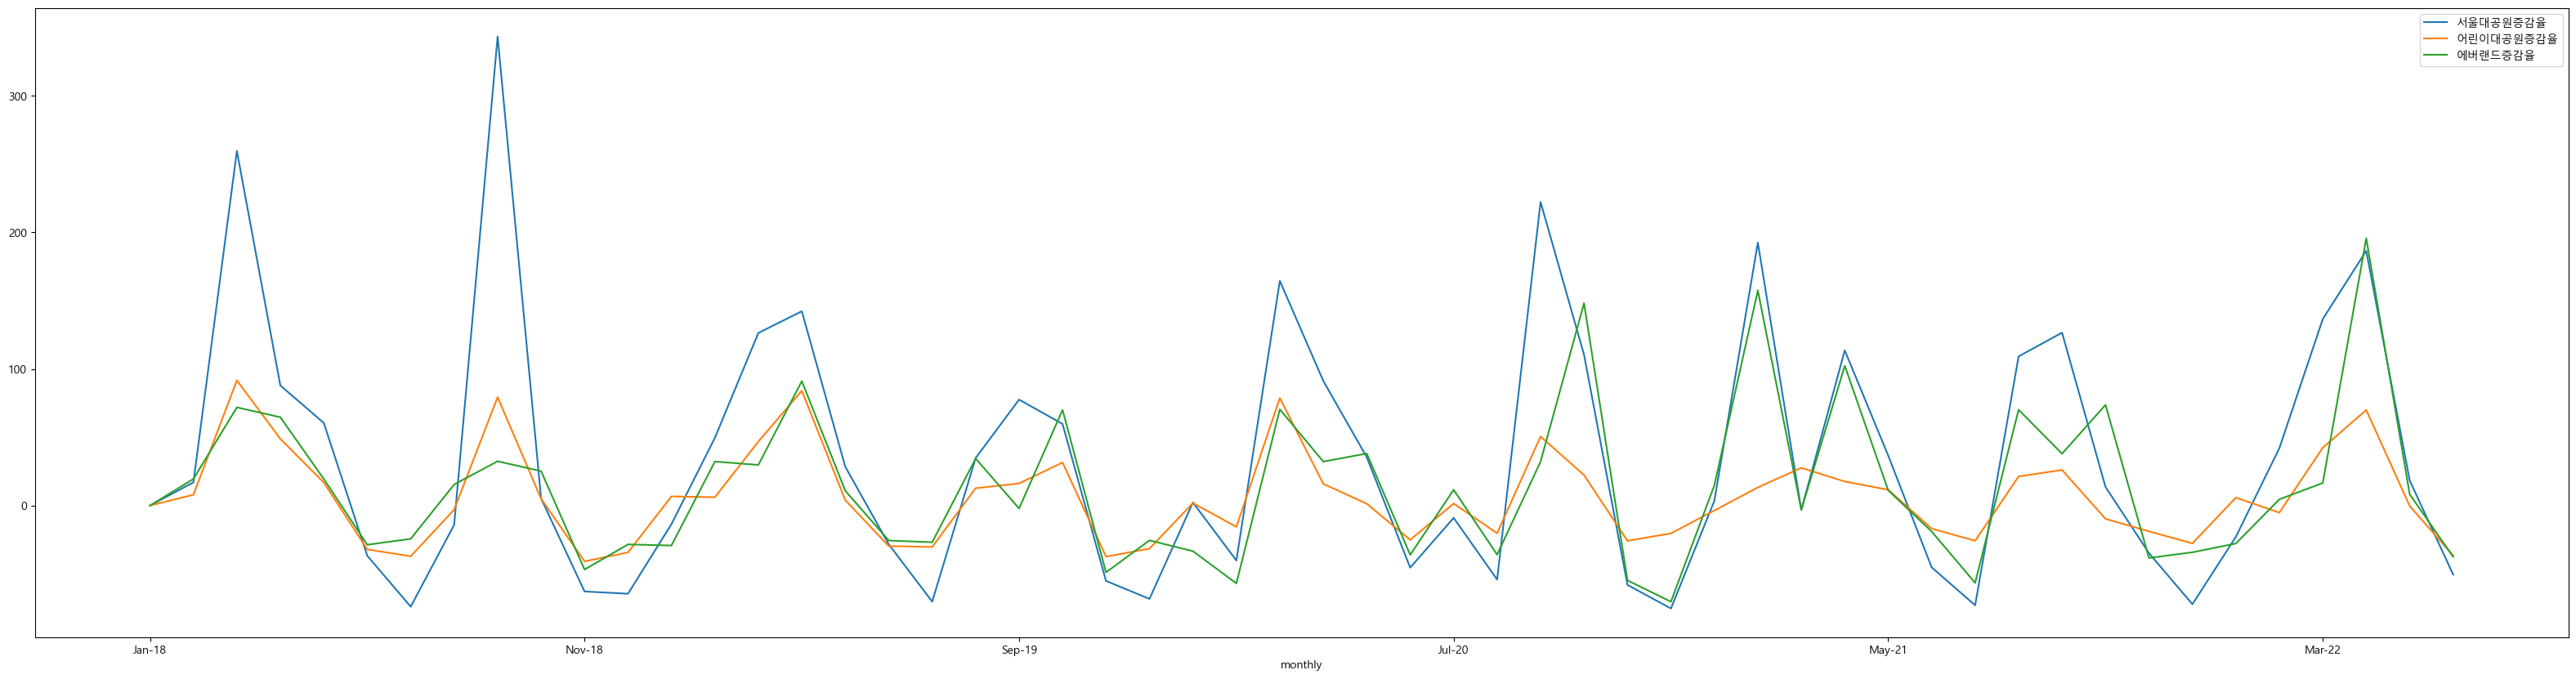

In [91]:
total.plot(x = 'monthly', y = ['서울대공원증감율','어린이대공원증감율','에버랜드증감율'], figsize = (40, 10))
plt.show()